In [1]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nilearn.image import load_img
from nilearn.masking import apply_mask

In [2]:
# Settings
# data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = "/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/"
# data_dir = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2"  # sim01 dir

space_label = "MNI152NLin2009cAsym"
derivatives_folder = "derivatives/fmriprep23"
task_label = "02a"
out_dir = os.path.join(data_dir, "derivatives", "nilearn_glm")
out_dir_group = os.path.join(data_dir, "derivatives", "nilearn_glm", "group")
group_fig_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_figures")
group_tab_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_tables")
group_roi_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_clusters")

In [3]:
# subject list
subject_list = [os.path.basename(x) for x in glob.glob(os.path.join(data_dir, "sub-*"))]
subject_list.sort()
subject_list

['sub-01',
 'sub-02',
 'sub-03',
 'sub-04',
 'sub-05',
 'sub-06',
 'sub-07',
 'sub-08',
 'sub-09',
 'sub-10',
 'sub-11',
 'sub-12',
 'sub-13',
 'sub-14',
 'sub-15',
 'sub-16',
 'sub-17',
 'sub-18',
 'sub-19',
 'sub-20']

In [4]:
contrasts_renamed = ["JoyfulActivation", "Nostalgia", "Peacefulness", "Power", "Sadness", "Tenderness", "Tension", "Transcendence", "Wonder"]

In [19]:
# find rois in group_roi_dir - the .nii.gz files start with 'mask_'
roi_files = glob.glob(os.path.join(group_roi_dir, "mask_*.nii.gz"))
roi_files.sort()
roi_files


['/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-01.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-02.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-03.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-04.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-05.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-06.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-07.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-08.nii.gz',
 '/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/n

In [20]:
# create roi_labels from roi_files
roi_labels = [os.path.basename(roi_file).replace("mask_", "").replace(".nii.gz", "") for roi_file in roi_files]
roi_labels

['clusterid-01',
 'clusterid-02',
 'clusterid-03',
 'clusterid-04',
 'clusterid-05',
 'clusterid-06',
 'clusterid-07',
 'clusterid-08',
 'clusterid-09',
 'clusterid-10',
 'clusterid-11',
 'clusterid-12',
 'clusterid-13',
 'clusterid-14',
 'clusterid-15']

In [21]:
# extract z value from ROIs

# create a data frame of the z values for each ROI and each contrast
df = pd.DataFrame(columns=["ROI", "Contrast", "z_value"])

for rr in range(len(roi_files)):
    roi_path = roi_files[rr]

    for cc in range(len(contrasts_renamed)):
        map_path = os.path.join(out_dir_group, f"group_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz")

        z_val = np.mean(apply_mask(map_path, roi_path))

        df.loc[len(df)] = [roi_labels[rr], contrasts_renamed[cc], z_val]

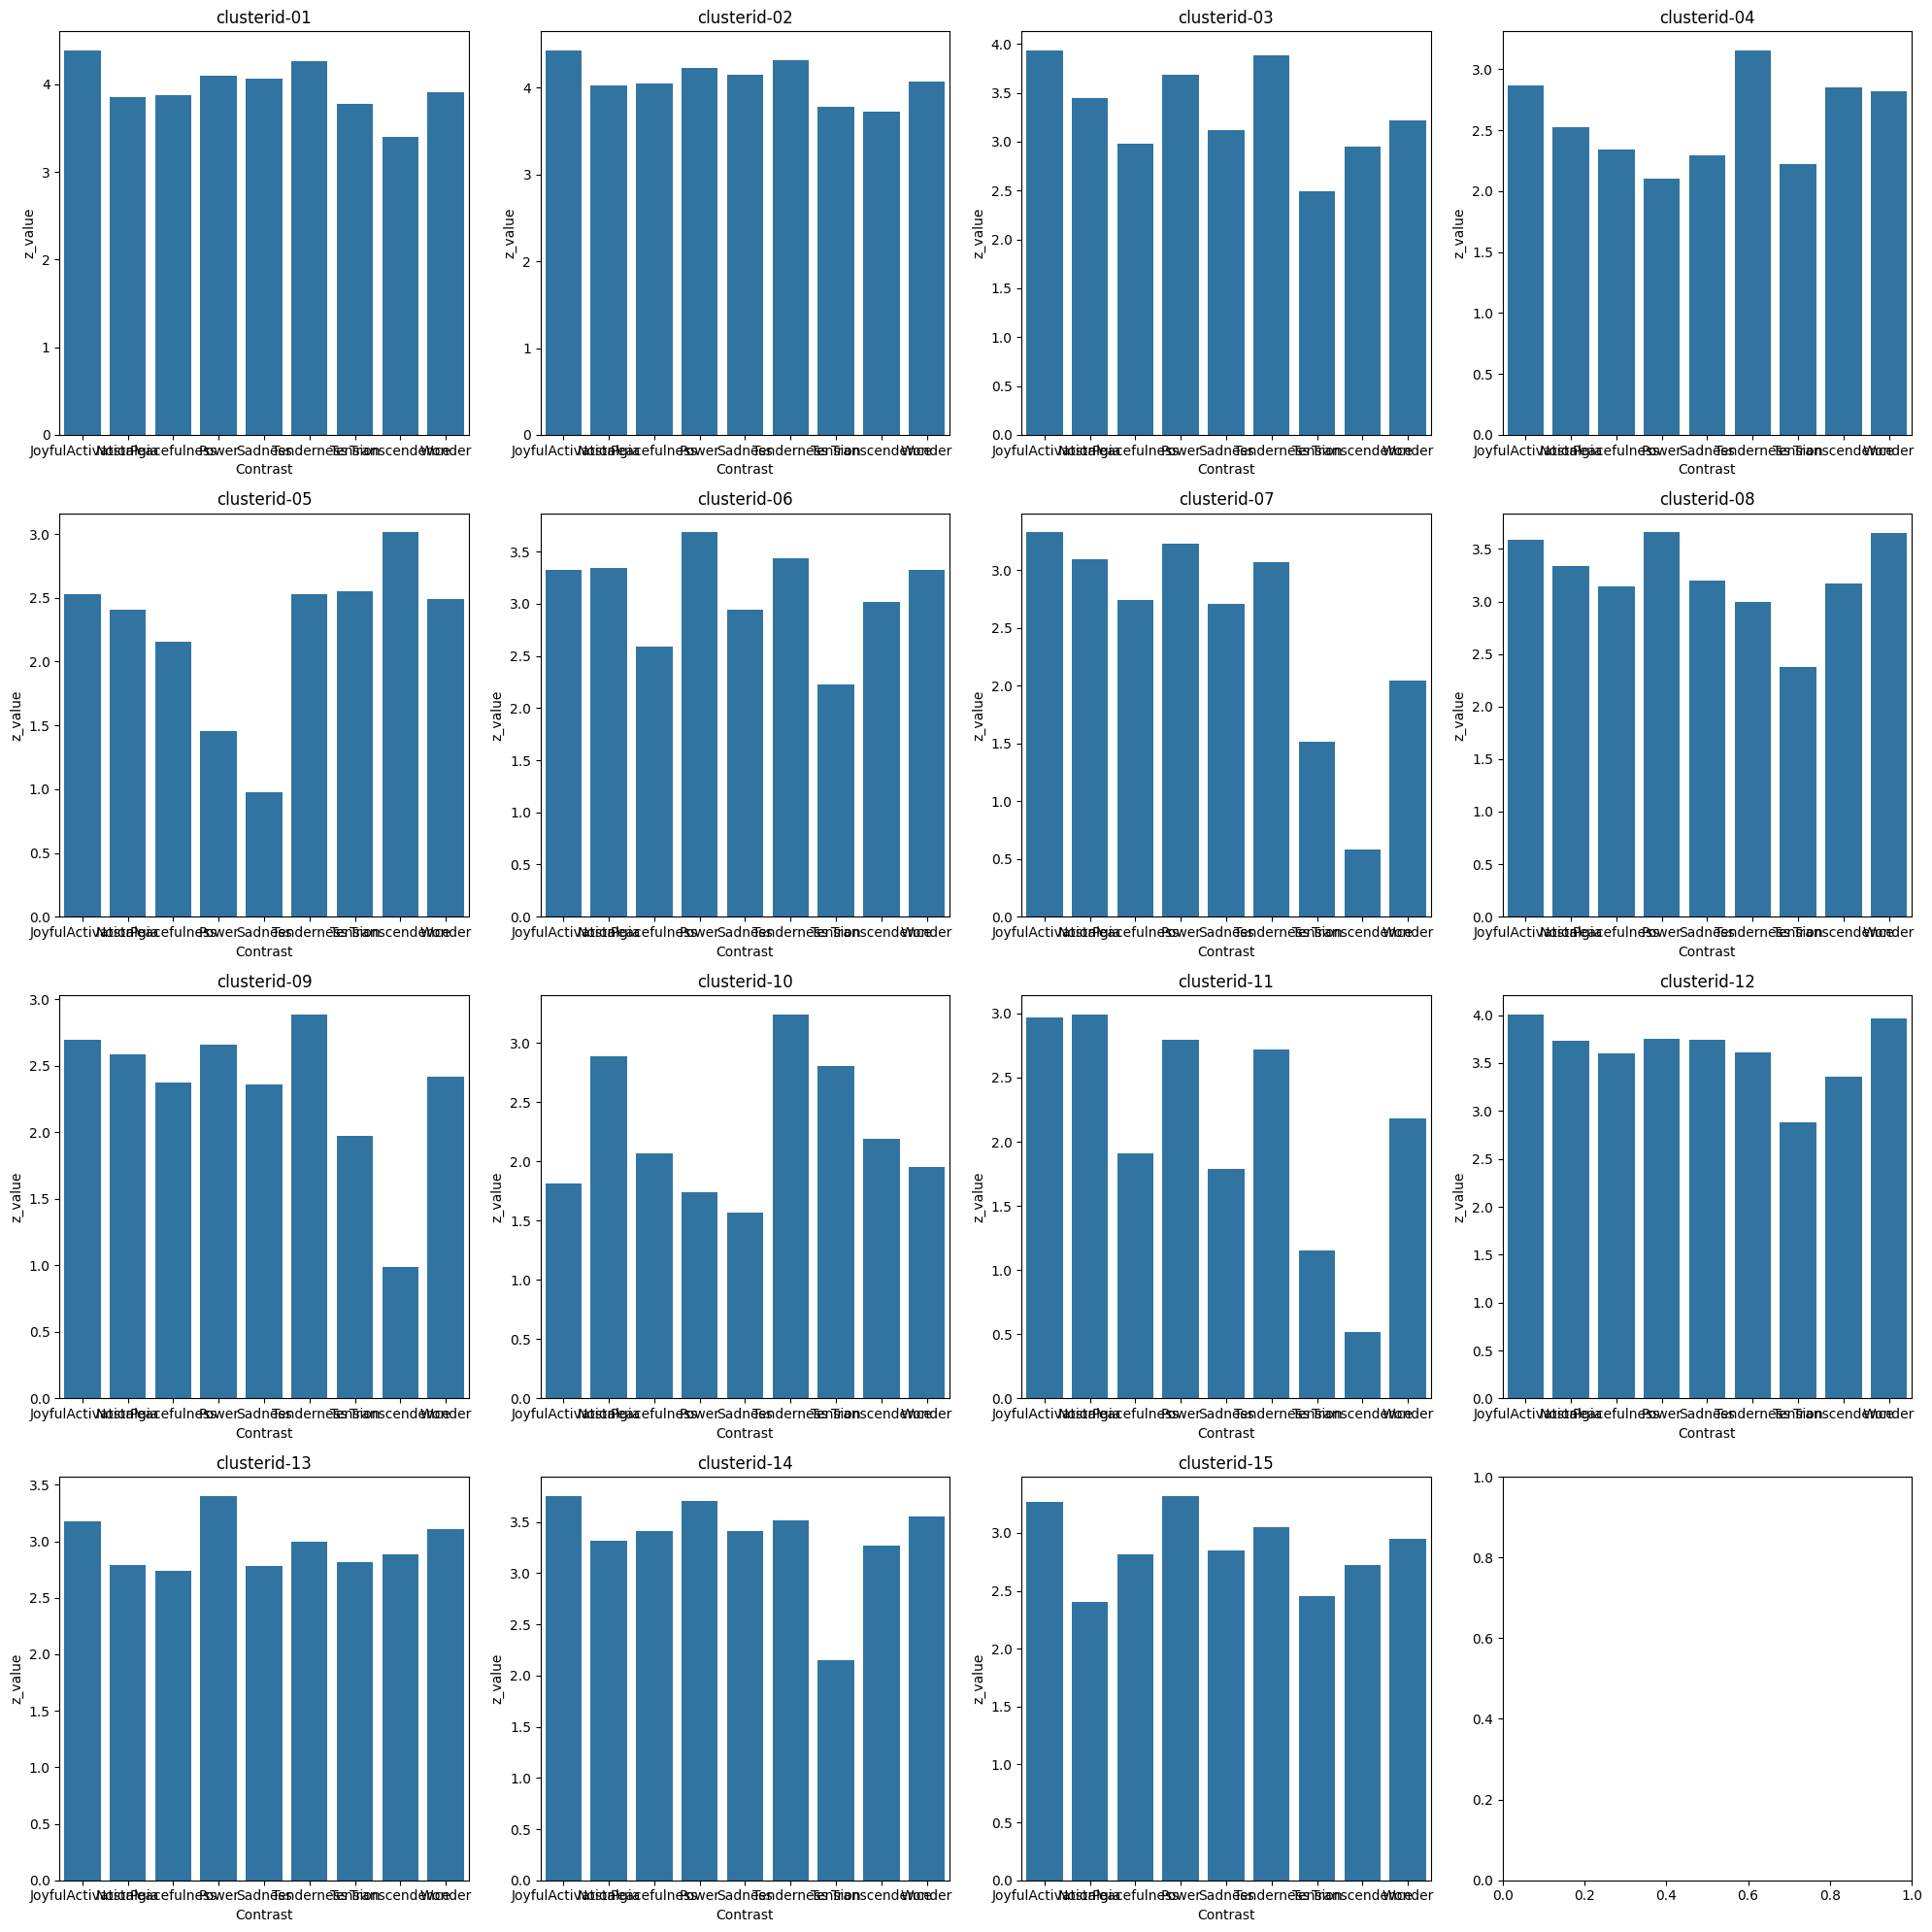

In [22]:
# create subplot for all ROIs to show barplots with the z values per condition
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for rr in range(len(roi_files)):
    sns.barplot(x="Contrast", y="z_value", data=df[df["ROI"] == roi_labels[rr]], ax=ax[rr // 4, rr % 4])
    ax[rr // 4, rr % 4].set_title(roi_labels[rr])
    # ax[rr//4, rr%4].set_xticklabels(ax[rr//4, rr%4].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

In [23]:
# extract z value from ROIs per subject

# create a data frame of the z values for each ROI and each contrast
df_ss = pd.DataFrame(columns=["ROI", "contrast", "subject", "z_value"])

for rr in range(len(roi_files)):
    roi_path = roi_files[rr]

    print(roi_path)

    for cc in range(len(contrasts_renamed)):
        for sub in range(len(subject_list)):
            map_path = os.path.join(out_dir, f"{subject_list[sub]}_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz")

            z_aux = apply_mask(map_path, roi_path)

            z_aux[z_aux <= 1] = None  # thresholding z values (mainly excluding zeros)

            z_val = np.nanmean(z_aux)

            df_ss.loc[len(df_ss)] = [roi_labels[rr], contrasts_renamed[cc], subject_list[sub], z_val]

/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-01.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-02.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-03.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-04.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-05.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-06.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-07.nii.gz


/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)


/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-08.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-09.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-10.nii.gz


/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)


/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-11.nii.gz


/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)


/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-12.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-13.nii.gz


/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of 

/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-14.nii.gz
/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-15.nii.gz


/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of empty slice
  z_val = np.nanmean(z_aux)
/tmp/ipykernel_717119/3835176012.py:19: RuntimeWarning: Mean of 

In [24]:
df_ss.shape

(2700, 4)

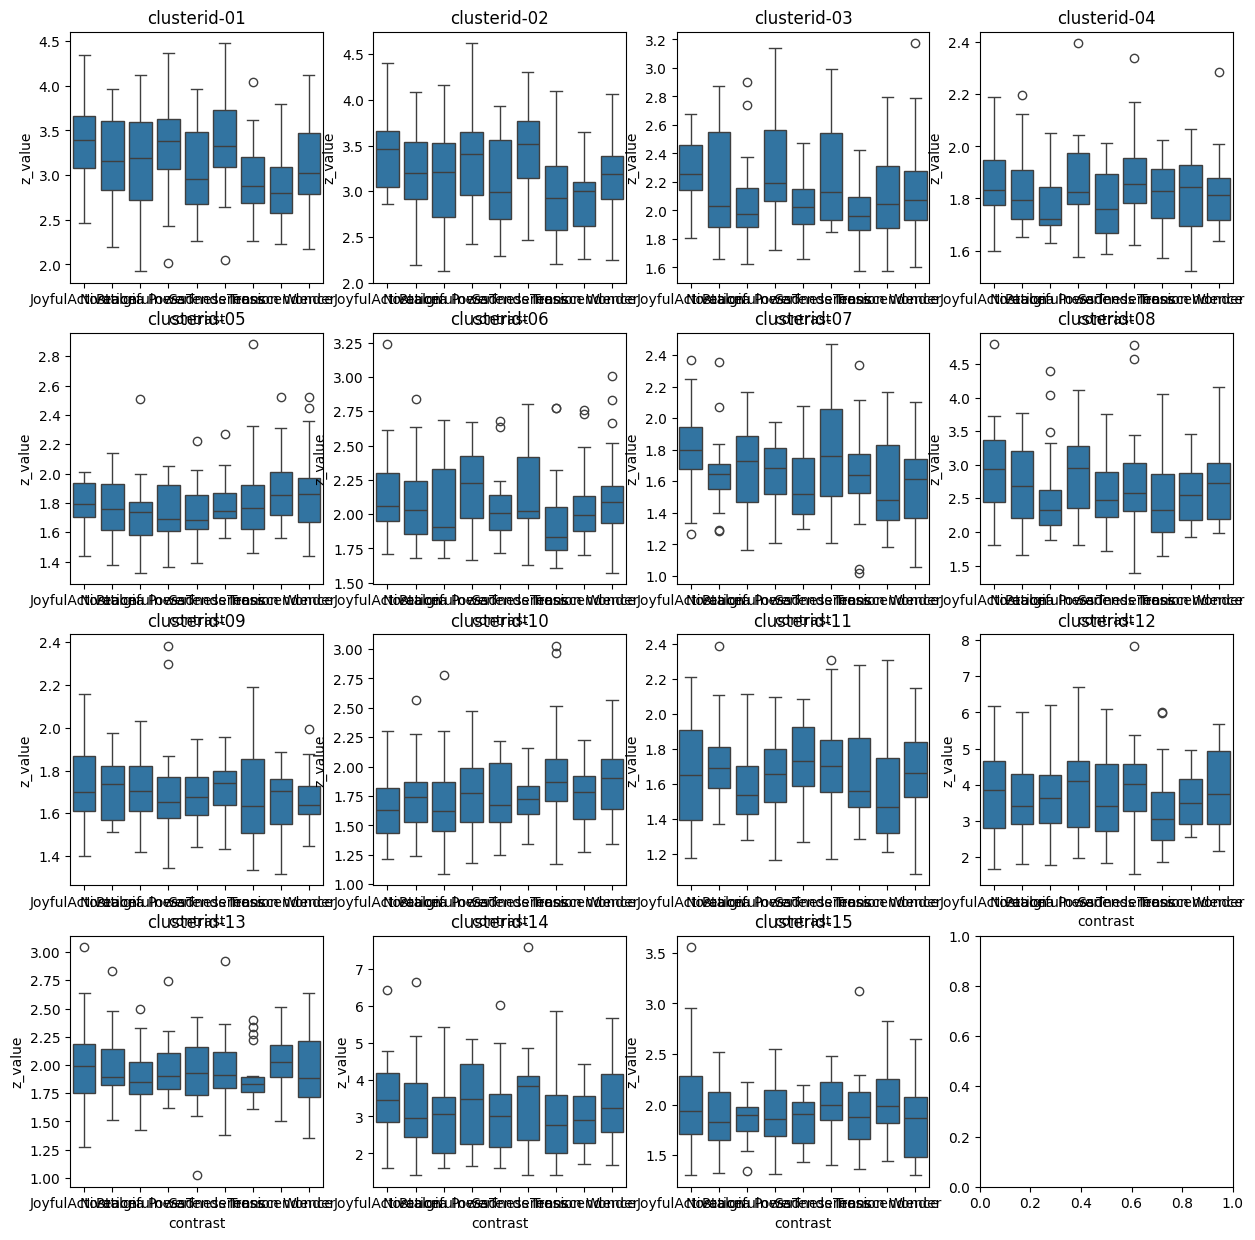

In [27]:
# create subplot for all ROIs to show boxplot with the z values per condition for all subjects

fig, ax = plt.subplots(4, 4, figsize=(15, 15))

for rr in range(len(roi_files)):
    sns.boxplot(x="contrast", y="z_value", data=df_ss[df_ss["ROI"] == roi_labels[rr]], ax=ax[rr // 4, rr % 4])
    ax[rr // 4, rr % 4].set_title(roi_labels[rr])
    # ax[rr//2, rr%2].set_xticklabels(ax[rr//2, rr%2].get_xticklabels(), rotation=45, ha='right')


# Koelsch

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampli


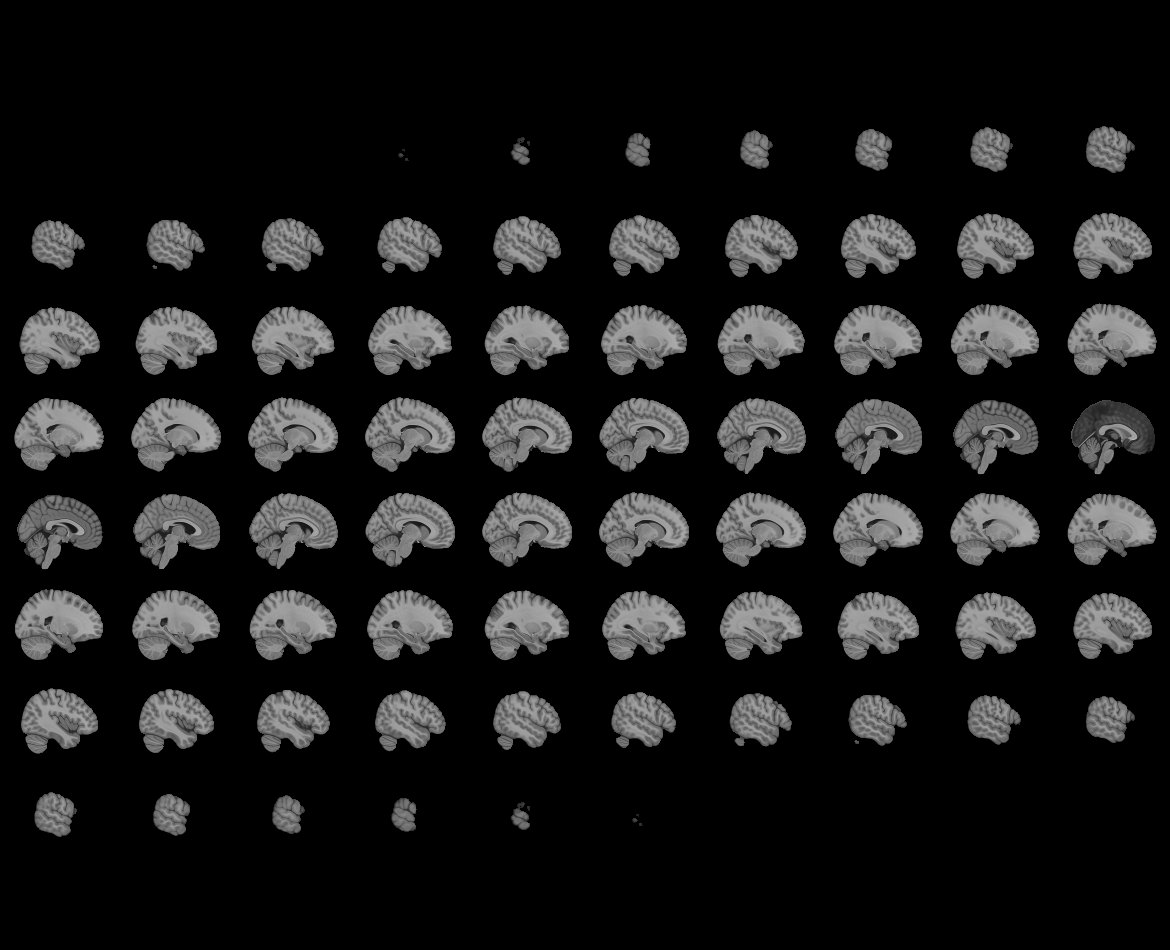
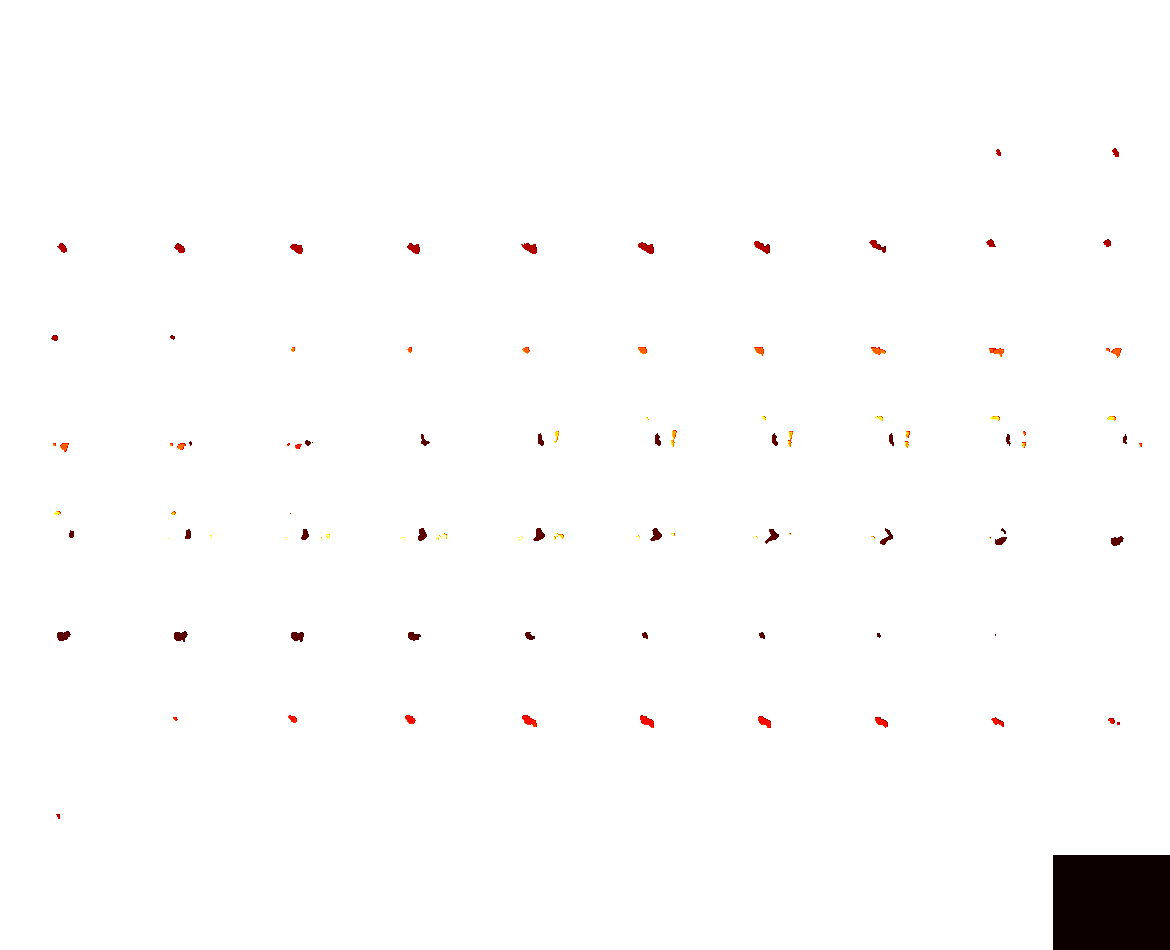

In [ ]:
# fetch the roi maps from Koelsch 2020 meta analysis
koelsch_file = os.path.join("..", "data", "koelsch", "Meta_analysis_C05_1k_clust_MNI.nii.gz")
koelsch_img = load_img(koelsch_file)
# koelsch_labels = ['R_hippocampal','R_amygdala','R_NAc_ventral_striatum',
#                   'R_caudate_nucleus','L_NAc_ventral_striatum','L_caudate_nucleus',
#                   ]
# plot koelsch_img values that are equal to 1 with view_img
from nilearn import plotting

# resample koelsch_img to the same resolution as the group z maps
from nilearn.image import math_img, resample_to_img

koelsch_img_resampled = resample_to_img(koelsch_img, map_path, interpolation="nearest")

plotting.view_img(koelsch_img_resampled)


In [15]:
# find unique values in koelsch_img_resampled
np.unique(koelsch_img_resampled.get_fdata())

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
# extract z values from Koelsch ROIs and boxplot them per condition
# create a data frame of the z values for each ROI and each contrast
df_koelsch = pd.DataFrame(columns=["ROI", "contrast", "subject", "z_value"])

for rr in range(1, 9):
    roi_path = math_img(f"(img == {rr})", img=koelsch_img_resampled)

    for cc in range(len(contrasts_renamed)):
        for sub in range(len(subject_list)):
            map_path = os.path.join(out_dir, f"{subject_list[sub]}_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz")

            z_aux = apply_mask(map_path, roi_path)

            z_aux[z_aux <= 1] = None

            z_val = np.nanmean(z_aux)

            df_koelsch.loc[len(df_koelsch)] = [f"Koelsch_{rr}", contrasts_renamed[cc], subject_list[sub], z_val]


/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_10144/3398571655.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[(rr-1)//2, (rr-1)%2].set_xticklabels(ax[(rr-1)//2, (rr-1)%2].get_xticklabels(), rotation=45, ha='right')
/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_10144/3398571655.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[(rr-1)//2, (rr-1)%2].set_xticklabels(ax[(rr-1)//2, (rr-1)%2].get_xticklabels(), rotation=45, ha='right')
/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_10144/3398571655.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[(rr-1)//2, (rr-1)%2].set_xticklabels(ax[(rr-1)//2, (rr-1)%2].get_xticklabels(), rotation=45, ha='right')
/var/folders/nd/bgqkn02j7sl982jdtqhts9z0

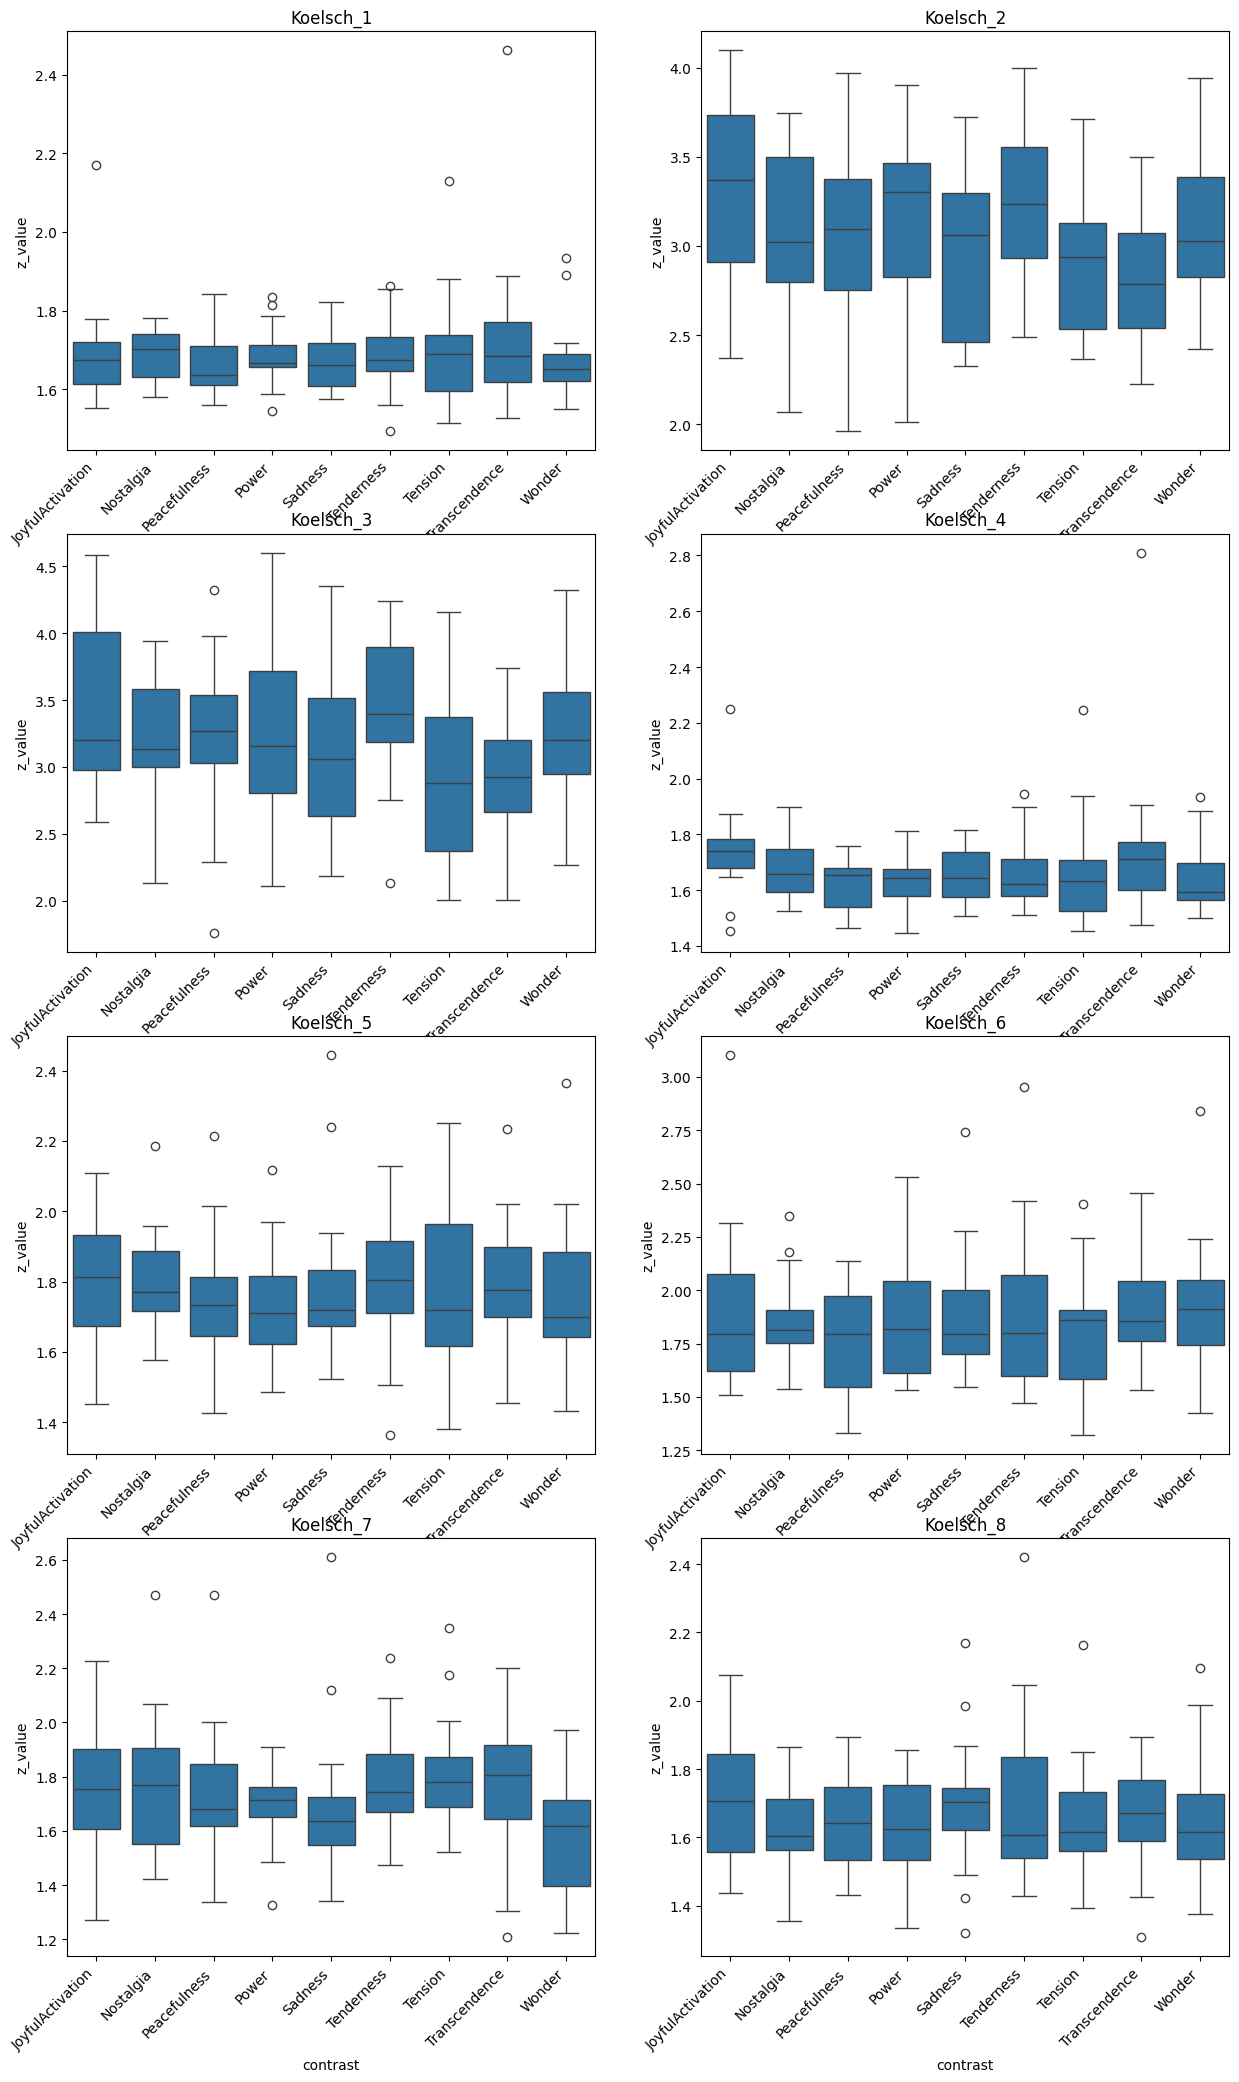

In [ ]:
# create subplot for all ROIs to show boxplot with the z values per condition for all subjects
fig, ax = plt.subplots(4, 2, figsize=(15, 25))

for rr in range(1, 9):
    sns.boxplot(x="contrast", y="z_value", data=df_koelsch[df_koelsch["ROI"] == f"Koelsch_{rr}"], ax=ax[(rr - 1) // 2, (rr - 1) % 2])
    ax[(rr - 1) // 2, (rr - 1) % 2].set_title(f"Koelsch_{rr}")
    ax[(rr - 1) // 2, (rr - 1) % 2].set_xticklabels(ax[(rr - 1) // 2, (rr - 1) % 2].get_xticklabels(), rotation=45, ha="right")

# Spheres
https://docs.google.com/spreadsheets/d/1hppc80VakrEwtmwH3o1wgbAtSD-AsT4h_t3B3IX4wHw/edit?pli=1#gid=1645002419

In [5]:
# load tsv file with the peak coordinates
peak_file = os.path.join("..", "data", "koelsch", "clusters_peak_MNI.csv")

df_peak = pd.read_csv(peak_file, sep=",")
df_peak

Label  mniX  mniY  mniZ
0   R_anterior_hippocampus    25   -12   -17
1               R_amygdala    21    -2   -16
2                    R_nac     9    11    -6
3                R_caudate     9     7     4
4                    L_nac   -12    13    -8
5                L_caudate    -8     9     3
6              L_auditory1   -53    -4    -1
7              L_auditory2   -51   -15     1
8          L_par_operculum   -44   -28    10
9              R_auditory1    51   -15     2
10             R_auditory2    53    -2    -3
11              L_amygdala   -18    -4   -18
12  L_anterior_hippocampus   -29   -14   -16
13      L_hippocampal_form   -28   -21   -17
14                   L_acc    -8    41    15
15                   L_s32    -8    43    -7
16                   L_pcc    -3   -26    43
17                   L_mcc    -5   -18    41
18                   R_fp2     7    53     4
19                   R_p24    11    42     4
20                   R_p32     7    40    -3
21        R_inf_colliculus     6   -31   -15
22     R_medial_geniculate    11   -27   -12

In [13]:
# generate spherical masks for each peak with a radius of 6mm using nilearn.maskers.NiftiSpheresMasker

from nilearn.maskers import NiftiSpheresMasker

masker = NiftiSpheresMasker(
    seeds=df_peak[["mniX", "mniY", "mniZ"]].values,
    radius=5,
    detrend=False,
    standardize=False,
    allow_overlap=True,
)

In [14]:
masker.fit()

report = masker.generate_report()
report

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/maskers/nifti_spheres_masker.py:451: UserWarning: No image provided to fit in NiftiSpheresMasker. Spheres are plotted on top of the MNI152 template.
  warnings.warn(msg)


In [15]:
df_koelsch_spheres = pd.DataFrame(columns=["ROI", "contrast", "subject", "z_value"])

for cc in range(len(contrasts_renamed)):
    print(contrasts_renamed[cc])
    for sub in range(len(subject_list)):
        map_path = os.path.join(out_dir, f"{subject_list[sub]}_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz")

        z_vals_roi = masker.fit_transform(map_path)

        for rr in range(z_vals_roi.shape[1]):
            df_koelsch_spheres.loc[len(df_koelsch_spheres)] = [df_peak["Label"][rr], contrasts_renamed[cc], subject_list[sub], z_vals_roi[0][rr]]


JoyfulActivation
Nostalgia
Peacefulness
Power
Sadness
Tenderness
Tension
Transcendence
Wonder


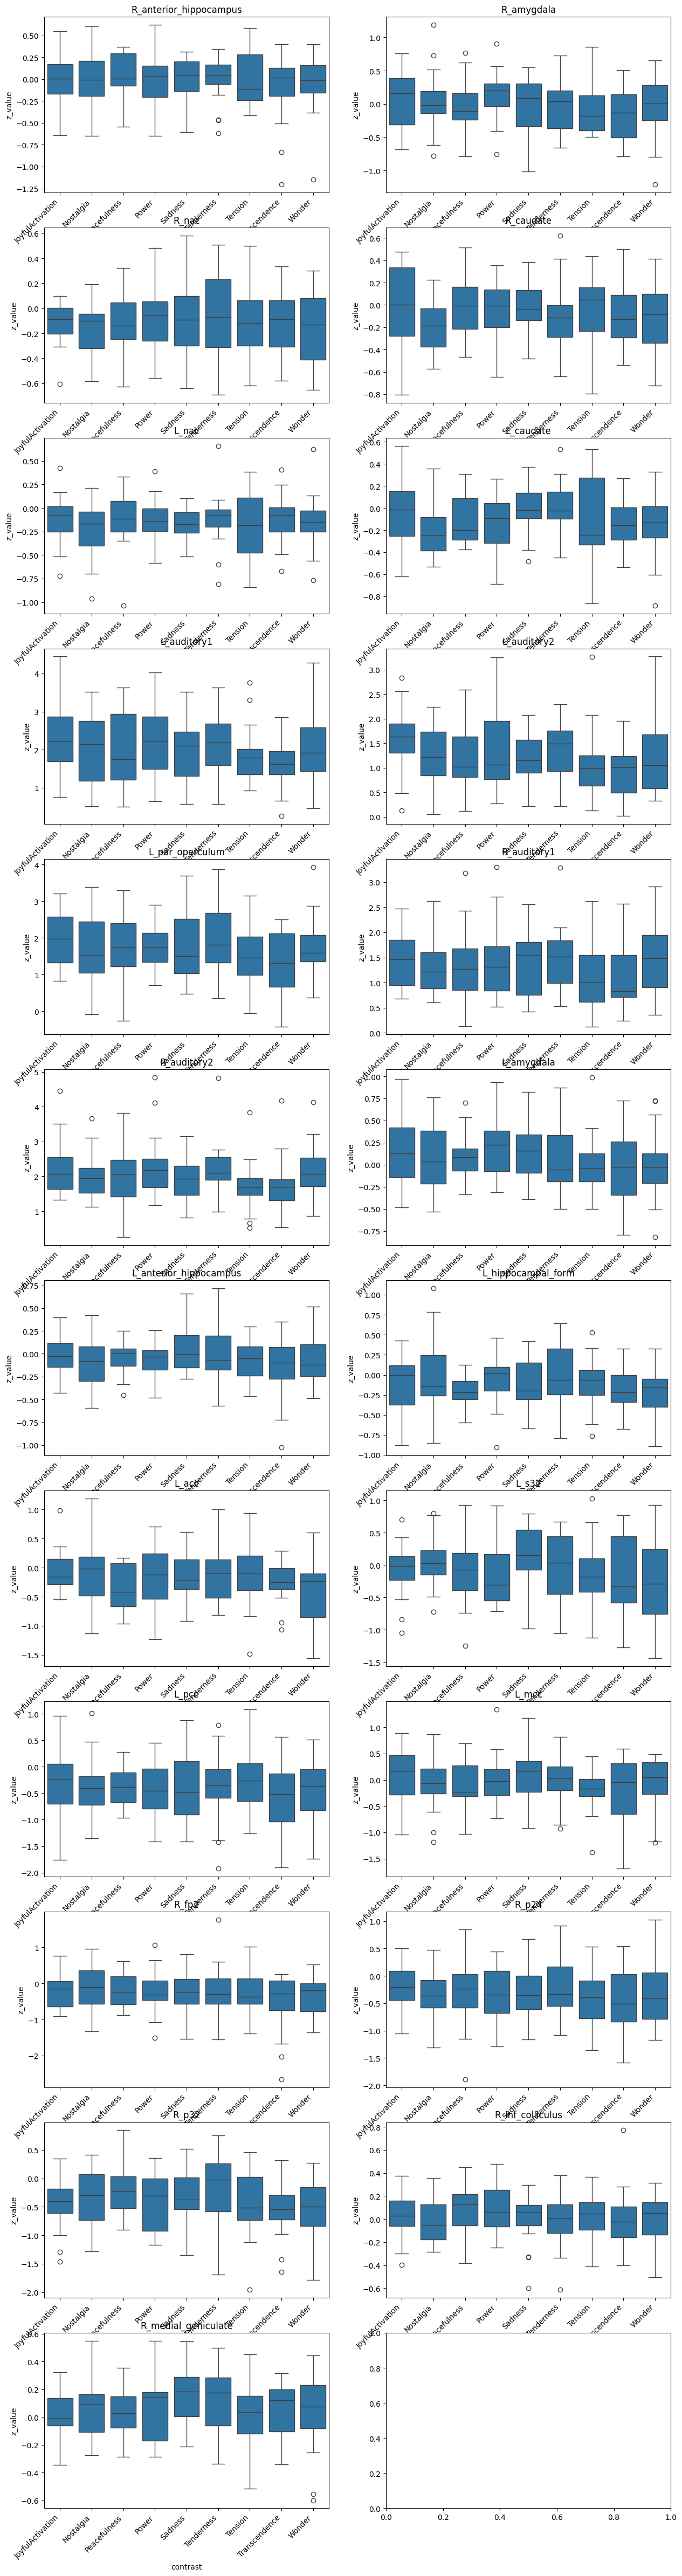

In [16]:
# boxplot the z values for each peak (total of 23) for all conditions
fig, ax = plt.subplots(12, 2, figsize=(15, 60))

for rr in range(23):
    sns.boxplot(x="contrast", y="z_value", data=df_koelsch_spheres[df_koelsch_spheres["ROI"] == df_peak["Label"][rr]], ax=ax[rr // 2, rr % 2])
    ax[rr // 2, rr % 2].set_title(df_peak["Label"][rr])
    ax[rr // 2, rr % 2].set_xticks(range(len(contrasts_renamed)))
    ax[rr // 2, rr % 2].set_xticklabels(ax[rr // 2, rr % 2].get_xticklabels(), rotation=45, ha="right")